In [19]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import cross_validation
from sklearn import metrics
from  sklearn import ensemble
import matplotlib.pyplot as plt
import math

In [5]:
data = pd.read_csv("data/gbm-data.csv")

In [15]:
X = data.values[:,1:]
y = data.values[:,0]

(3751, 1776)

In [16]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.8,random_state=241)
X_train.shape

(750, 1776)

      Iter       Train Loss   Remaining Time 
         1           1.2613           23.30s
         2           1.1715           23.92s
         3           1.1009           24.36s
         4           1.0529           24.67s
         5           1.0130           25.26s
         6           0.9740           25.13s
         7           0.9475           24.13s
         8           0.9197           23.99s
         9           0.8979           23.56s
        10           0.8730           23.56s
        20           0.7207           20.91s
        30           0.6055           19.65s
        40           0.5244           18.49s
        50           0.4501           17.41s
        60           0.3908           16.48s
        70           0.3372           15.71s
        80           0.3009           14.74s
        90           0.2603           13.88s
       100           0.2327           12.94s
       200           0.0835            4.27s


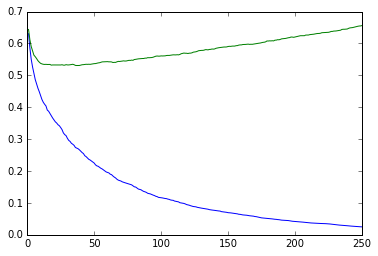

In [36]:
#for rate in [1, 0.5, 0.3, 0.2, 0.1]: 
for rate in [0.2]:  
    clf = ensemble.GradientBoostingClassifier(n_estimators=250, verbose=True, random_state=241, learning_rate=rate)
    clf.fit(X_train, y_train)
    on_train = clf.staged_decision_function(X_train)
    on_test = clf.staged_decision_function(X_test)
    plot_train = []
    plot_test = []
    for i, y_pred in enumerate(on_train):
        y_pred_transformed = 1/(1+math.e**(-1*y_pred))
        loss = metrics.log_loss(y_true=y_train, y_pred=y_pred_transformed)
        plot_train.append([i+1, loss])
    
    for i, y_pred in enumerate(on_test):
        y_pred_transformed = 1/(1+math.e**(-1*y_pred))
        loss = metrics.log_loss(y_true=y_test, y_pred=y_pred_transformed)
        plot_test.append([i+1, loss])
    
    plot_train = np.array(plot_train)
    plot_test  = np.array(plot_test)
    
    plt.plot(plot_train[:, 0], plot_train[:, 1])
    plt.plot(plot_test[:, 0], plot_test[:, 1])

In [45]:
smallest_loss_i = plot_test[:, 1].argsort()[0]
smallest_loss = plot_test[smallest_loss_i]
smallest_loss

array([ 37.        ,   0.53091816])

In [52]:
print("Smallest loss with n_estimators=" + str(int(smallest_loss[0])) + " is "+str(round(smallest_loss[1], 2)))

Smallest loss with n_estimators=37 is 0.53


In [48]:
forest_clf = ensemble.RandomForestClassifier(n_estimators=int(smallest_loss[0]), random_state=241)
forest_clf.fit(X_train,y_train)
predicted = forest_clf.predict_proba(X_test)
loss = metrics.log_loss(y_true=y_test, y_pred=predicted)

In [50]:
print(str(round(loss, 2)))

0.54
